In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

import scipy
import pickle
import pandas as pd

In [2]:
def Bias(est_mat, true_val):
    a = est_mat - true_val
    return np.mean(a, axis=0, where=~(np.isinf(a) | np.isnan(a)))

def RMSE(est_mat, true_val):
    a = (est_mat - true_val)**2
    return np.sqrt(np.mean(a, axis=0, where=~(np.isinf(a) | np.isnan(a))))

def CovProb(est_mat, sd_mat, true_val, alpha=0.95):
    low_ci = est_mat + sd_mat*scipy.stats.norm.ppf((1 - alpha)/2)
    up_ci = est_mat - sd_mat*scipy.stats.norm.ppf((1 - alpha)/2)
    return np.mean((low_ci <= true_val) & (up_ci >= true_val), axis=0)

In [16]:
n = 2000

np.random.seed(123)
# Data generating process
X_sim = 2*np.random.rand(n) - 1
T_sim = np.sin(np.pi*X_sim) + np.random.rand(n)*0.6 - 0.3
Y_sim = T_sim**2 + T_sim**3 + 10*X_sim + np.random.normal(loc=0, scale=1, size=n)
X_dat = np.concatenate([T_sim.reshape(-1,1), X_sim.reshape(-1,1)], axis=1)

# Query points 
t_qry = np.linspace(-0.6, 0.6, 50)
# t_qry = np.linspace(-0.5, 0.5, 40)
# t_qry = np.linspace(min(T_sim)+0.2, max(T_sim)-0.2, 50)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


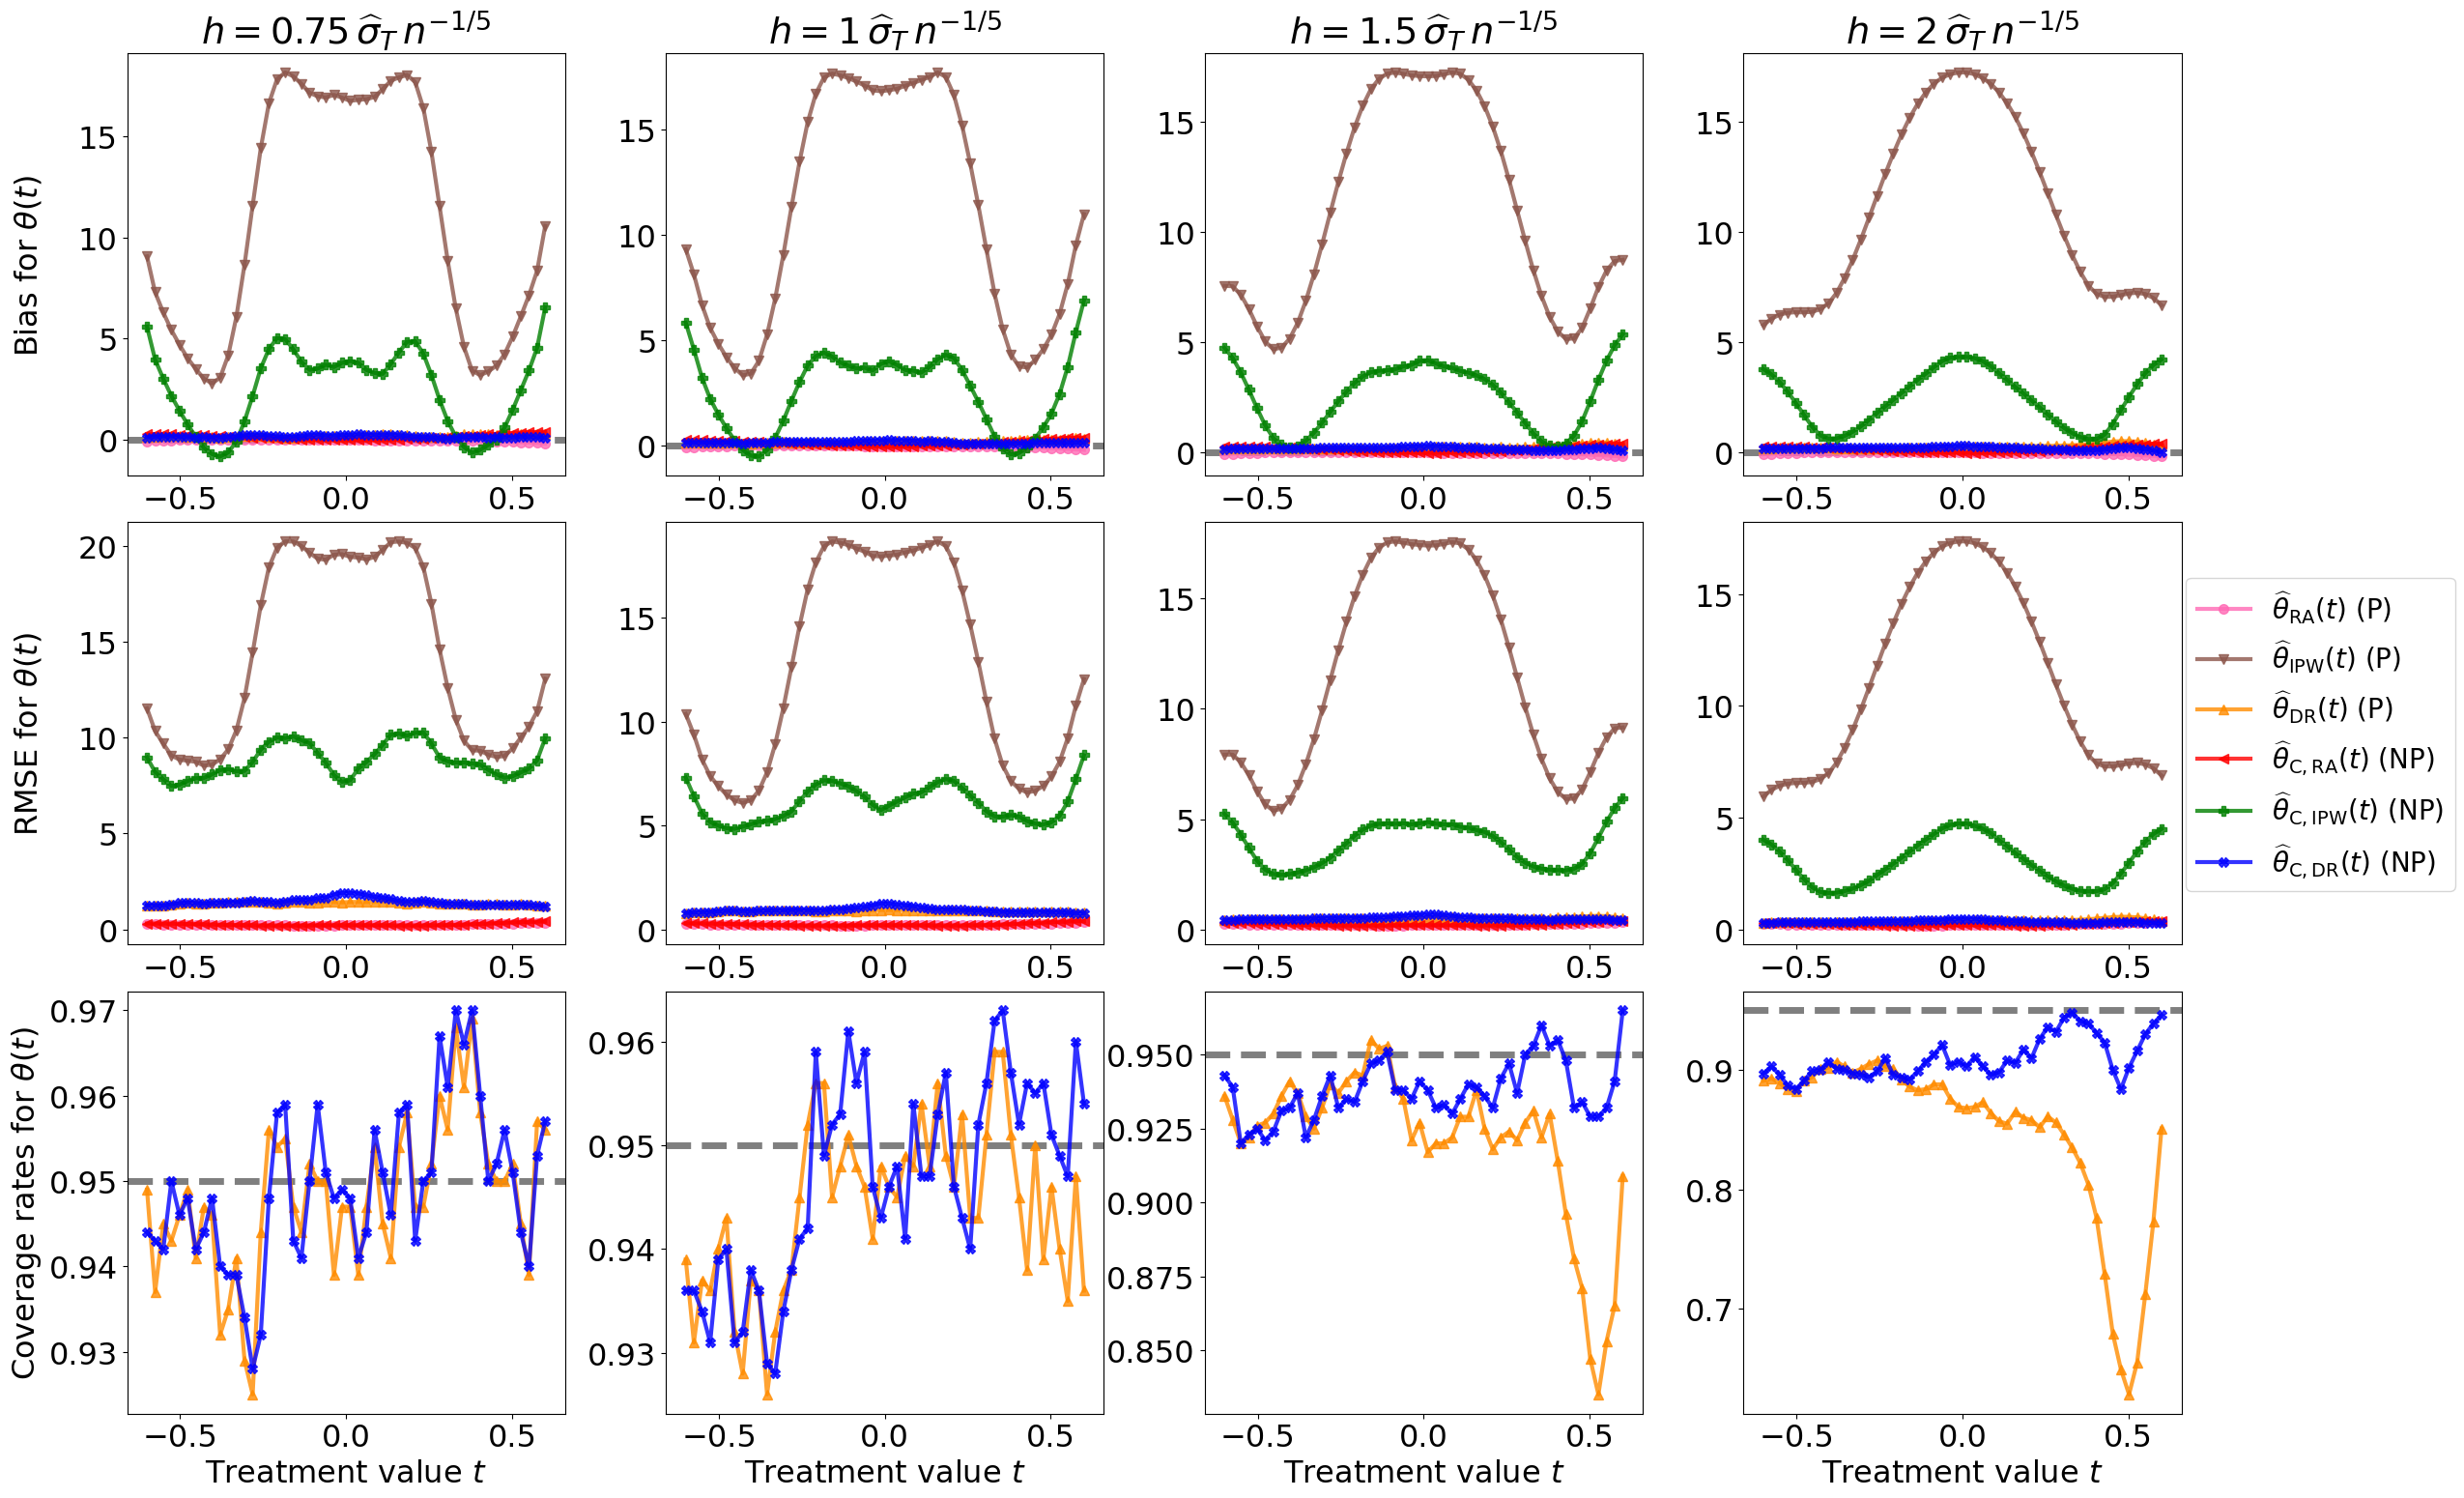

In [59]:
fac_lst = [0.75, 1, 1.5, 2]
theta_true = 2*t_qry + 3*(t_qry**2)

j = 0
plt.rcParams.update({'font.size': 23})
fig, ax = plt.subplots(3, 4, figsize=(26, 16))

for fac in fac_lst:
    with open('./Syn_Results/Sim1_Nopos_theta_h'+str(fac)+'_inner_selfnorm3.dat', "rb") as file:
        theta_ra5_lst, theta_ra1_lst, theta_ipw5_lst, theta_ipw1_lst,\
        theta_dr5_lst, theta_sd_dr5_lst, theta_dr1_lst, theta_sd_dr1_lst,\
        theta_C_RA5_lst, theta_C_RA1_lst, theta_C_IPW5_lst, theta_C_IPW1_lst,\
        theta_C_DR5_lst, theta_C_sd_DR5_lst, theta_C_DR1_lst, theta_C_sd_DR1_lst = pickle.load(file)
        
    # Bias
    theta_ra5_bias = Bias(np.array(theta_ra5_lst), theta_true)
    theta_ipw5_bias = Bias(np.array(theta_ipw5_lst), theta_true)
    theta_dr5_bias = Bias(np.array(theta_dr5_lst), theta_true)
    
    ## Without positivity
    theta_C_RA5_bias = Bias(np.array(theta_C_RA5_lst), theta_true)
    theta_C_IPW5_bias = Bias(np.array(theta_C_IPW5_lst), theta_true)
    theta_C_DR5_bias = Bias(np.array(theta_C_DR5_lst), theta_true)
    
    # RMSE
    theta_ra5_rmse = RMSE(np.array(theta_ra5_lst), theta_true)
    theta_ipw5_rmse = RMSE(np.array(theta_ipw5_lst), theta_true)
    theta_dr5_rmse = RMSE(np.array(theta_dr5_lst), theta_true)
    
    ## Without positivity
    theta_C_RA5_rmse = RMSE(np.array(theta_C_RA5_lst), theta_true)
    theta_C_IPW5_rmse = RMSE(np.array(theta_C_IPW5_lst), theta_true)
    theta_C_DR5_rmse = RMSE(np.array(theta_C_DR5_lst), theta_true)
    
    # Coverage
    theta_dr5_cov = CovProb(np.array(theta_dr5_lst), np.array(theta_sd_dr5_lst), theta_true, alpha=0.95)
    
    ## Without positivity
    theta_C_DR5_cov = CovProb(np.array(theta_C_DR5_lst), np.array(theta_C_sd_DR5_lst), theta_true, alpha=0.95)
    
    
    res_bias = np.column_stack([t_qry, theta_ra5_bias, theta_ipw5_bias, theta_dr5_bias, 
                                theta_C_RA5_bias, theta_C_IPW5_bias, theta_C_DR5_bias])
        
    res_rmse = np.column_stack([t_qry, theta_ra5_rmse, theta_ipw5_rmse, theta_dr5_rmse, 
                                theta_C_RA5_rmse, theta_C_IPW5_rmse, theta_C_DR5_rmse])
    res_cov = np.column_stack([t_qry, theta_dr5_cov, theta_C_DR5_cov])
                                           
    
    res_bias2 = pd.DataFrame(res_bias)
    res_rmse2 = pd.DataFrame(res_rmse)
    
    res_cov2 = pd.DataFrame(res_cov)
    
    lab_lst1 = [r'$\widehat{\theta}_{\mathrm{RA}}(t)$ (P)', r'$\widehat{\theta}_{\mathrm{IPW}}(t)$ (P)', 
                r'$\widehat{\theta}_{\mathrm{DR}}(t)$ (P)', 
                r'$\widehat{\theta}_{\mathrm{C,RA}}(t)$ (NP)', r'$\widehat{\theta}_{\mathrm{C,IPW}}(t)$ (NP)', 
                r'$\widehat{\theta}_{\mathrm{C,DR}}(t)$ (NP)']
    col_lst1 = ['hotpink', 'tab:brown', 'darkorange', 'red', 'green', 'blue']
    mark_lst = ["o", "v", "^", "<", "P", "X"]
    
    # Plotting bias
    ax[0][j].axhline(y=0, color='black', linestyle='dashed', linewidth=5, alpha=0.5)
    for i in range(res_bias2.shape[1] - 1):
        ax[0][j].plot(t_qry, res_bias2.iloc[:,i+1], label=lab_lst1[i], color=col_lst1[i], 
                      markersize=7, linewidth=3, marker=mark_lst[i], alpha=0.8)
    ax[0][0].set_ylabel(r'Bias for $\theta(t)$')
    ax[0][j].set_title(r'$h=$'+str(fac)+'$\,\widehat{\sigma}_T \,n^{-1/5}$')
    # ax[0][j].set_ylim([-0.5, 5])
    
    # Plotting RMSE
    for i in range(res_rmse2.shape[1] - 1):
        ax[1][j].plot(t_qry, res_rmse2.iloc[:,i+1], label=lab_lst1[i], color=col_lst1[i], 
                      markersize=7, linewidth=3, marker=mark_lst[i], alpha=0.8)
    # ax[1][j].set_xlabel(r'Query point $T=t$')
    ax[1][0].set_ylabel(r'RMSE for $\theta(t)$')
    ax[1][3].legend(bbox_to_anchor=(0.98, 0.9), fontsize=20)
    # ax[1][j].set_ylim([-0.5, 5])
    
    lab_lst2 = [r'$\widehat{\theta}_{\mathrm{DR}}(t)$ (P)', r'$\widehat{\theta}_{\mathrm{C,DR}}(t)$ (NP)']
    col_lst2 = ['darkorange', 'blue']
    
    # Plotting Coverage
    ax[2][j].axhline(y=0.95, color='black', linestyle='dashed', linewidth=5, alpha=0.5)
    for i in range(res_cov2.shape[1] - 1):
        ax[2][j].plot(t_qry, res_cov2.iloc[:,i+1], label=lab_lst2[i], color=col_lst2[i], 
                      markersize=7, linewidth=3, marker=mark_lst[3*i+2], alpha=0.8)
    ax[2][j].set_xlabel(r'Treatment value $t$')
    ax[2][0].set_ylabel(r'Coverage rates for $\theta(t)$')
    # ax[2][3].legend(bbox_to_anchor=(1, 0.9))
    
    j += 1
fig.align_ylabels()
fig.tight_layout()
fig.subplots_adjust(wspace=0.23, hspace=0.11)
fig.savefig('./Figures/theta_nopos_L5.pdf')